<a href="https://colab.research.google.com/github/rahulku91058/Training-AIML/blob/main/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rahulku91058/Training-AIML.git
%cd Training-AIML/CNN

Cloning into 'Training-AIML'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 190 (delta 74), reused 85 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (190/190), 40.30 MiB | 16.64 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/Training-AIML/CNN


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
# Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

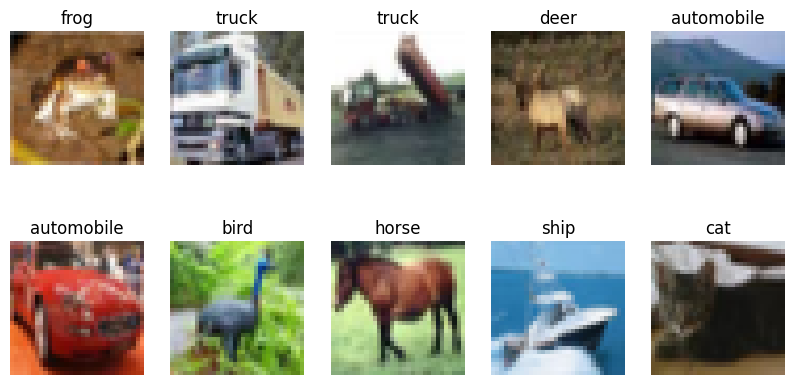

In [5]:
# Display some sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [6]:
model = models.Sequential()

# Convolutional and pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Layers
# Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()   # View Model Architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2396 - loss: 2.7304 - val_accuracy: 0.4389 - val_loss: 1.5199
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4779 - loss: 1.4264 - val_accuracy: 0.5198 - val_loss: 1.3191
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5568 - loss: 1.2404 - val_accuracy: 0.5561 - val_loss: 1.2484
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6038 - loss: 1.1173 - val_accuracy: 0.5650 - val_loss: 1.2736
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6285 - loss: 1.0505 - val_accuracy: 0.5921 - val_loss: 1.2012
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6615 - loss: 0.9714 - val_accuracy: 0.6427 - val_loss: 1.0403
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6881 - loss: 0.8888 - val_accuracy: 0.6540 - val_loss: 1.0275
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7117 - loss: 0.8298 - val_accuracy: 0

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

313/313 - 2s - 5ms/step - accuracy: 0.6739 - loss: 1.0232
Test accuracy: 0.67


In [10]:
# Predict the first 10 test images
predictions = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


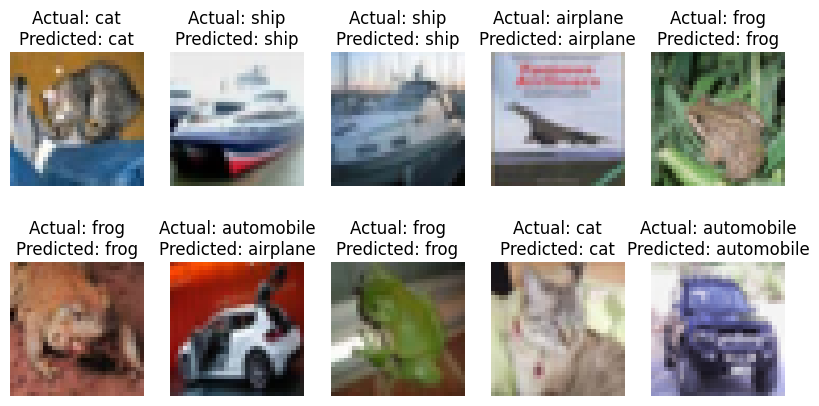

In [12]:
# Display prediction and actual labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f'Actual: {class_names[np.argmax(y_test[i])]}\nPredicted: {class_names[np.argmax(predictions[i])]}')
    plt.axis('off')
plt.show()

In [ ]:
# path to the image
image_path = '/content/Training-AIML/CNN/bird.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
# Predict the class of the image
prediction = model.predict(img_array)

In [ ]:
# Map prediction to class name (e.g., CIFAR-10 class names)
class_names = ['Airplane', 'Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
predicted_class = class_names[np.argmax(prediction)]
print(f'Predicted class: {predicted_class}')